**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [3]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [29]:
d = {'max_depth':[1,3,6,9,12], 'n_estimators':[1,10,50,100,200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [30]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf,
                           param_grid = d,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)




____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [31]:
grid_search = grid_search.fit(X_train, y_train)

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [33]:
results = grid_search.cv_results_
Res = pd.DataFrame(results)
Res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028506,0.008196,0.002405,0.003674,1,1,"{'max_depth': 1, 'n_estimators': 1}",0.776945,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.777309,0.776897,0.000141,21
1,0.131717,0.014308,0.004845,0.004528,1,10,"{'max_depth': 1, 'n_estimators': 10}",0.776945,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.777309,0.776897,0.000141,21
2,0.578902,0.022295,0.013714,0.004099,1,50,"{'max_depth': 1, 'n_estimators': 50}",0.776945,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.777309,0.776897,0.000141,21
3,1.120230,0.033534,0.026056,0.003979,1,100,"{'max_depth': 1, 'n_estimators': 100}",0.776945,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.777309,0.776897,0.000141,21
4,2.214833,0.048048,0.046005,0.003562,1,200,"{'max_depth': 1, 'n_estimators': 200}",0.776945,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.77684,0.777309,0.776897,0.000141,21


**Find the best hyperparameters from the cross-validation.**

In [34]:
best_parameters = grid_search.best_params_
best_parameters

{'max_depth': 12, 'n_estimators': 50}

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [35]:
# Create a 5x5 grid
import matplotlib.pyplot as plt

piv = pd.pivot_table(Res, index='param_max_depth', columns='param_n_estimators', values='mean_test_score')
piv

param_n_estimators,1,10,50,100,200
param_max_depth,,,,,
1,0.776897,0.776897,0.776897,0.776897,0.776897
3,0.796775,0.818621,0.814261,0.813792,0.815386
6,0.809198,0.819699,0.820402,0.820496,0.820683
9,0.799447,0.820168,0.820261,0.820871,0.820590
12,0.784117,0.818105,0.821996,0.821246,0.821434


In [36]:
# Set color map to `plt.cm.jet`
cmp=plt.cm.jet

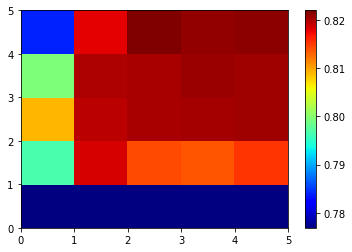

In [37]:
# Visualize pcolormesh
c = plt.pcolormesh(piv, cmap =cmp) 
plt.colorbar(c)
plt.show()

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [38]:
# Create a dataframe of the feature names and importance
Final_res = Res[['params','rank_test_score']]
Final_res

,params,rank_test_score
0,"{'max_depth': 1, 'n_estimators': 1}",21
1,"{'max_depth': 1, 'n_estimators': 10}",21
2,"{'max_depth': 1, 'n_estimators': 50}",21
3,"{'max_depth': 1, 'n_estimators': 100}",21
4,"{'max_depth': 1, 'n_estimators': 200}",21
5,"{'max_depth': 3, 'n_estimators': 1}",19
6,"{'max_depth': 3, 'n_estimators': 10}",12
7,"{'max_depth': 3, 'n_estimators': 50}",15
8,"{'max_depth': 3, 'n_estimators': 100}",16
9,"{'max_depth': 3, 'n_estimators': 200}",14


In [40]:
# Sort values by importance
Final_res.sort_values(by=['rank_test_score']).head(10)

,params,rank_test_score
22,"{'max_depth': 12, 'n_estimators': 50}",1
24,"{'max_depth': 12, 'n_estimators': 200}",2
23,"{'max_depth': 12, 'n_estimators': 100}",3
18,"{'max_depth': 9, 'n_estimators': 100}",4
14,"{'max_depth': 6, 'n_estimators': 200}",5
19,"{'max_depth': 9, 'n_estimators': 200}",6
13,"{'max_depth': 6, 'n_estimators': 100}",7
12,"{'max_depth': 6, 'n_estimators': 50}",8
17,"{'max_depth': 9, 'n_estimators': 50}",9
16,"{'max_depth': 9, 'n_estimators': 10}",10
